# Import Libraries

In [53]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_squared_error
import sklearn as sklearn

In [54]:
df = pd.read_csv("./dengue_features_train.csv")

In [55]:
df_lables = pd.read_csv('./dengue_labels_train.csv')


# Exploratory Data Analysis

In [56]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [57]:
df_lables.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [58]:
df.count()

city                                     1456
year                                     1456
weekofyear                               1456
week_start_date                          1456
ndvi_ne                                  1262
ndvi_nw                                  1404
ndvi_se                                  1434
ndvi_sw                                  1434
precipitation_amt_mm                     1443
reanalysis_air_temp_k                    1446
reanalysis_avg_temp_k                    1446
reanalysis_dew_point_temp_k              1446
reanalysis_max_air_temp_k                1446
reanalysis_min_air_temp_k                1446
reanalysis_precip_amt_kg_per_m2          1446
reanalysis_relative_humidity_percent     1446
reanalysis_sat_precip_amt_mm             1443
reanalysis_specific_humidity_g_per_kg    1446
reanalysis_tdtr_k                        1446
station_avg_temp_c                       1413
station_diur_temp_rng_c                  1413
station_max_temp_c                

In [59]:
df_lables.count()

city           1456
year           1456
weekofyear     1456
total_cases    1456
dtype: int64

In [60]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [61]:
df_lables.columns

Index(['city', 'year', 'weekofyear', 'total_cases'], dtype='object')

In [62]:
Duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", Duplicate_rows_df.shape)

number of duplicate rows:  (0, 24)


In [63]:
Duplicate_rows_df = df_lables[df_lables.duplicated()]
print("number of duplicate rows: ", Duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


In [64]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [65]:
df_lables.isnull().sum()

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

In [66]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [67]:
df_lables.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [69]:
df_lables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [70]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [71]:
#Check Null Values
df[df.isnull().any(axis=1)]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1
13,sj,1990,31,1990-07-30,NaN,0.247150,0.379700,0.381357,32.66,299.862857,...,34.60,80.584286,32.66,17.594286,2.585714,28.242857,8.085714,34.4,22.8,37.6
14,sj,1990,32,1990-08-06,NaN,0.064333,0.164443,0.138857,28.80,300.391429,...,20.00,79.650000,28.80,17.950000,2.328571,28.200000,7.557143,33.3,23.3,11.4
15,sj,1990,33,1990-08-13,NaN,0.128033,0.206957,0.168243,90.75,299.958571,...,101.90,84.178571,90.75,18.515714,1.857143,28.042857,6.685714,32.8,22.8,44.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,iq,2009,23,2009-06-04,0.114000,0.092443,0.097471,0.126286,42.22,296.125714,...,53.91,95.507143,42.22,16.757143,6.071429,28.100000,11.800000,34.0,22.2,NaN
1409,iq,2009,32,2009-08-06,0.395000,0.352733,0.484286,0.401914,9.79,297.370000,...,34.40,87.811429,9.79,16.337143,11.757143,27.975000,12.100000,35.4,20.5,NaN
1430,iq,2010,53,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431,iq,2010,1,2010-01-08,0.124571,0.179129,0.163843,0.135471,27.04,299.264286,...,8.50,78.271429,27.04,16.127143,11.100000,28.600000,12.300000,35.1,21.8,NaN


In [72]:
df.corr()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
year,1.000000,-0.071649,0.223361,0.144345,0.234234,0.277759,0.205302,-0.140016,0.085043,0.132273,...,0.132625,0.336349,0.205302,0.161596,0.490542,0.047010,0.373644,0.227320,-0.214482,0.219910
weekofyear,-0.071649,1.000000,0.053548,0.048759,0.121557,0.068701,0.118037,0.425753,0.463677,0.348946,...,0.072955,-0.015191,0.118037,0.350821,0.077933,0.368408,0.023220,0.232098,0.292362,0.066294
ndvi_ne,0.223361,0.053548,1.000000,0.850902,0.614380,0.669504,0.205736,-0.340976,-0.037682,0.056077,...,0.199411,0.457985,0.205736,0.094852,0.673935,0.186227,0.658129,0.491922,-0.315696,0.242263
ndvi_nw,0.144345,0.048759,0.850902,1.000000,0.555809,0.651938,0.193563,-0.317862,-0.030974,0.063289,...,0.190989,0.449152,0.193563,0.100626,0.645596,0.203975,0.649483,0.490122,-0.304206,0.221314
ndvi_se,0.234234,0.121557,0.614380,0.555809,1.000000,0.820924,0.074633,-0.157447,0.051348,0.002810,...,0.034792,0.215606,0.074633,0.028795,0.486047,0.089242,0.449599,0.290691,-0.251621,0.131326
ndvi_sw,0.277759,0.068701,0.669504,0.651938,0.820924,1.000000,0.124047,-0.227824,0.022533,0.020746,...,0.101652,0.311759,0.124047,0.053437,0.569554,0.121060,0.545899,0.377393,-0.294684,0.158345
precipitation_amt_mm,0.205302,0.118037,0.205736,0.193563,0.074633,0.124047,1.000000,-0.017229,0.106384,0.434722,...,0.481159,0.499984,1.000000,0.451202,0.201427,0.225408,0.193358,0.296215,0.076680,0.486637
reanalysis_air_temp_k,-0.140016,0.425753,-0.340976,-0.317862,-0.157447,-0.227824,-0.017229,1.000000,0.901777,0.529771,...,-0.128219,-0.402338,-0.017229,0.508380,-0.280375,0.619974,-0.261457,0.227768,0.719612,-0.173851
reanalysis_avg_temp_k,0.085043,0.463677,-0.037682,-0.030974,0.051348,0.022533,0.106384,0.901777,1.000000,0.614268,...,-0.031728,-0.168371,0.106384,0.612484,0.124200,0.751330,0.107581,0.512220,0.579864,-0.048052
reanalysis_dew_point_temp_k,0.132273,0.348946,0.056077,0.063289,0.002810,0.020746,0.434722,0.529771,0.614268,1.000000,...,0.432970,0.553766,0.434722,0.997051,-0.033512,0.743506,0.037151,0.492319,0.651535,0.241335


In [73]:
df.corr().unstack().sort_values().drop_duplicates().head(20)

reanalysis_tdtr_k                     reanalysis_min_air_temp_k   -0.815511
reanalysis_min_air_temp_k             station_diur_temp_rng_c     -0.715676
                                      ndvi_ne                     -0.623116
reanalysis_max_air_temp_k             reanalysis_min_air_temp_k   -0.600850
reanalysis_min_air_temp_k             ndvi_nw                     -0.588806
                                      ndvi_sw                     -0.494284
station_min_temp_c                    reanalysis_tdtr_k           -0.451940
                                      station_diur_temp_rng_c     -0.439345
reanalysis_relative_humidity_percent  reanalysis_min_air_temp_k   -0.410714
ndvi_se                               reanalysis_min_air_temp_k   -0.407931
reanalysis_relative_humidity_percent  reanalysis_air_temp_k       -0.402338
reanalysis_min_air_temp_k             year                        -0.392351
ndvi_ne                               reanalysis_air_temp_k       -0.340976
reanalysis_a

In [74]:
df.corr().unstack().sort_values().drop_duplicates().tail(20)

station_diur_temp_rng_c      ndvi_ne                                  0.658129
ndvi_ne                      ndvi_sw                                  0.669504
reanalysis_tdtr_k            ndvi_ne                                  0.673935
station_max_temp_c           station_diur_temp_rng_c                  0.715217
reanalysis_air_temp_k        station_min_temp_c                       0.719612
station_min_temp_c           reanalysis_min_air_temp_k                0.720701
reanalysis_air_temp_k        reanalysis_min_air_temp_k                0.736765
reanalysis_dew_point_temp_k  station_avg_temp_c                       0.743506
station_avg_temp_c           reanalysis_specific_humidity_g_per_kg    0.747809
                             reanalysis_avg_temp_k                    0.751330
reanalysis_max_air_temp_k    station_max_temp_c                       0.763446
station_avg_temp_c           station_max_temp_c                       0.764576
ndvi_se                      ndvi_sw                

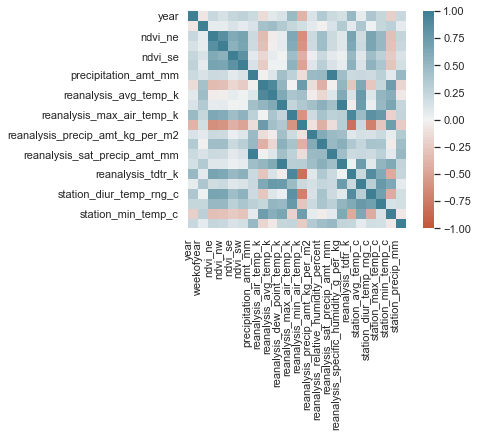

In [75]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

<AxesSubplot:>

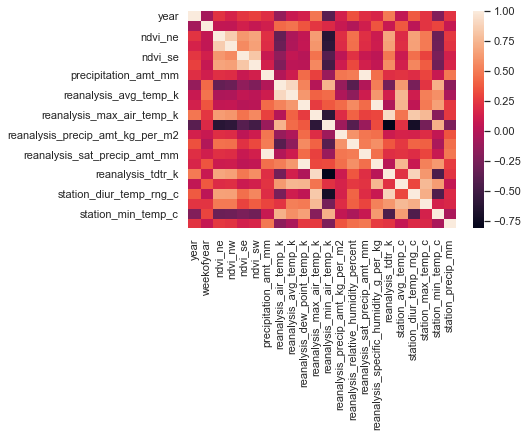

In [76]:
sns.heatmap(df.corr())


# Data Insights
1. There are in Total 1456 Rows nd 24 columns.
2. Max values are null is of ndvi_ne
3. Data type of City is Object and same for week start date
4. Top 5 Correlated metrics are as follows:
    "reanalysis_tdtr_k" and "reanalysis_min_air_temp_k" is -0.815511  ,
    "reanalysis_min_air_temp_k" and  "station_diur_temp_rng_c" is "-0.715676"  ,
    " missing"  and "ndvi_ne" is "-0.623116","reanalysis_max_air_temp_k" and "reanalysis_min_air_temp_k" is "-0.600850",
    "reanalysis_min_air_temp_k" and "ndvi_nw" is "-0.588806"
   

# Data Modelling

In [77]:
final = pd.merge(df,df_lables,on=['city','year','weekofyear'])

In [78]:
final

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [79]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [80]:
City_Values = {"city":     {"sj":1 , "iq": 0}}
final = final.replace(City_Values)
final


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,0,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,0,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,0,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [81]:
final.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


<AxesSubplot:>

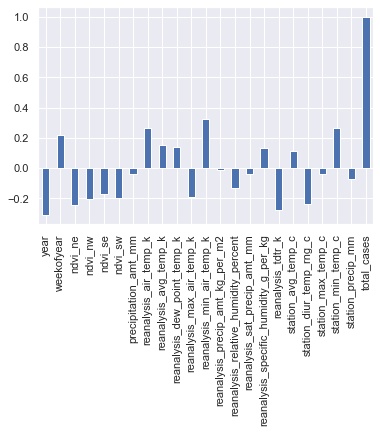

In [82]:
final[final.columns[1:]].corr()['total_cases'][:].plot(kind='bar')

<AxesSubplot:>

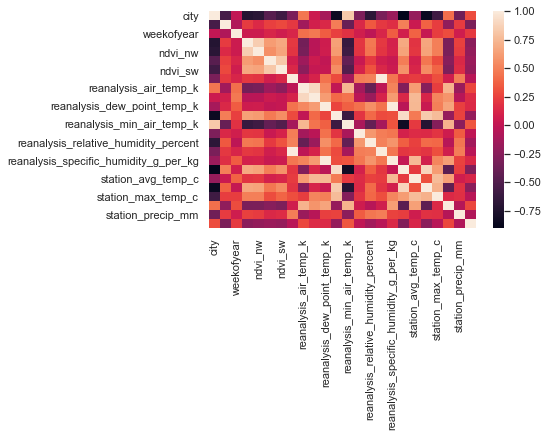

In [83]:
sns.heatmap(final.corr())

In [84]:
final['week_start_date'] = pd.to_datetime(final['week_start_date'])

In [85]:
list(final['week_start_date'].unique())

[numpy.datetime64('1990-04-30T00:00:00.000000000'),
 numpy.datetime64('1990-05-07T00:00:00.000000000'),
 numpy.datetime64('1990-05-14T00:00:00.000000000'),
 numpy.datetime64('1990-05-21T00:00:00.000000000'),
 numpy.datetime64('1990-05-28T00:00:00.000000000'),
 numpy.datetime64('1990-06-04T00:00:00.000000000'),
 numpy.datetime64('1990-06-11T00:00:00.000000000'),
 numpy.datetime64('1990-06-18T00:00:00.000000000'),
 numpy.datetime64('1990-06-25T00:00:00.000000000'),
 numpy.datetime64('1990-07-02T00:00:00.000000000'),
 numpy.datetime64('1990-07-09T00:00:00.000000000'),
 numpy.datetime64('1990-07-16T00:00:00.000000000'),
 numpy.datetime64('1990-07-23T00:00:00.000000000'),
 numpy.datetime64('1990-07-30T00:00:00.000000000'),
 numpy.datetime64('1990-08-06T00:00:00.000000000'),
 numpy.datetime64('1990-08-13T00:00:00.000000000'),
 numpy.datetime64('1990-08-20T00:00:00.000000000'),
 numpy.datetime64('1990-08-27T00:00:00.000000000'),
 numpy.datetime64('1990-09-03T00:00:00.000000000'),
 numpy.datet

In [86]:
final = final.drop('week_start_date',1)

In [87]:
final

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,0,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,0,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,0,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [88]:
import seaborn as sns

In [89]:
final.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [90]:
# sns.pairplot(final)
final.dtypes

city                                       int64
year                                       int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c  

In [91]:
final.dtypes

city                                       int64
year                                       int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c  

In [92]:
for x in final.columns:
    if final[x].isnull().values.any():
        print(x)
        final[x].fillna(final[x].mean(),inplace=True)

ndvi_ne
ndvi_nw
ndvi_se
ndvi_sw
precipitation_amt_mm
reanalysis_air_temp_k
reanalysis_avg_temp_k
reanalysis_dew_point_temp_k
reanalysis_max_air_temp_k
reanalysis_min_air_temp_k
reanalysis_precip_amt_kg_per_m2
reanalysis_relative_humidity_percent
reanalysis_sat_precip_amt_mm
reanalysis_specific_humidity_g_per_kg
reanalysis_tdtr_k
station_avg_temp_c
station_diur_temp_rng_c
station_max_temp_c
station_min_temp_c
station_precip_mm


In [93]:
final.isna().sum()


city                                     0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases

In [94]:
final2 = final.drop(['ndvi_ne','ndvi_nw','ndvi_se','precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm','reanalysis_precip_amt_kg_per_m2','station_avg_temp_c','station_max_temp_c','station_precip_mm'],1)
final2

,city,year,weekofyear,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_diur_temp_rng_c,station_min_temp_c,total_cases
0,1,1990,18,0.177617,297.572857,297.742857,292.414286,299.8,295.9,14.012857,2.628571,6.900000,20.0,4
1,1,1990,19,0.155486,298.211429,298.442857,293.951429,300.9,296.4,15.372857,2.371429,6.371429,22.2,5
2,1,1990,20,0.170843,298.781429,298.878571,295.434286,300.5,297.3,16.848571,2.300000,6.485714,22.8,4
3,1,1990,21,0.235886,298.987143,299.228571,295.310000,301.4,297.0,16.672857,2.428571,6.771429,23.3,3
4,1,1990,22,0.247340,299.518571,299.664286,295.821429,301.9,297.5,17.210000,3.014286,9.371429,23.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0,2010,21,0.292514,299.334286,300.771429,296.825714,309.7,294.5,18.485714,9.800000,11.933333,22.4,5
1452,0,2010,22,0.225657,298.330000,299.392857,296.452857,308.5,291.9,18.070000,7.471429,10.500000,21.7,8
1453,0,2010,23,0.233714,296.598571,297.592857,295.501429,305.5,292.4,17.008571,7.500000,6.900000,19.2,1
1454,0,2010,24,0.325486,296.345714,297.521429,295.324286,306.1,291.9,16.815714,7.871429,8.733333,21.0,1


<AxesSubplot:>

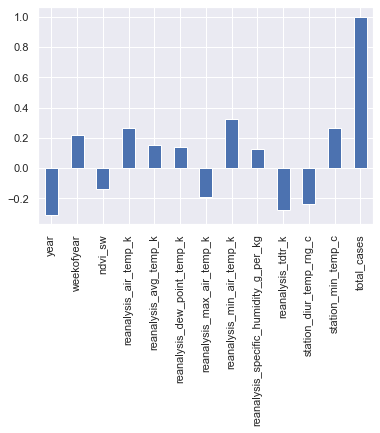

In [95]:
final2[final2.columns[1:]].corr()['total_cases'][:].plot(kind='bar')

# Model Running



In [96]:
model = LinearRegression()

In [97]:
model.fit(final2.drop(['total_cases'],1),final2['total_cases'])

LinearRegression()

In [98]:
y_pred = model.predict(final2.drop(['total_cases'],1))

In [99]:
y_test = final2['total_cases']

In [100]:
import matplotlib.pyplot as plt


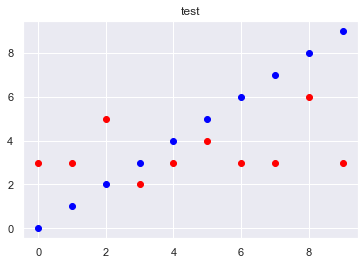

In [101]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return


y_test = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_test, y_pred, "test")

In [102]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

   Actual  Predicted
0       0          3
1       1          3
2       2          5
3       3          2
4       4          3
5       5          4
6       6          3
7       7          3
8       8          6
9       9          3


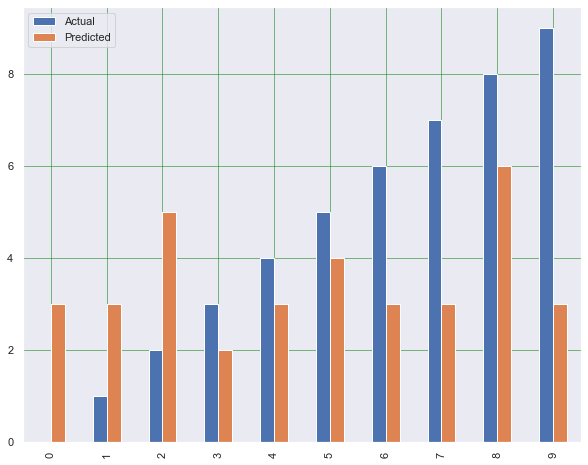

In [103]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [104]:
sklearn.metrics.mean_squared_error(y_test, y_pred,sample_weight=None, multioutput='uniform_average', squared=True)

9.0